In [11]:
import pickle
import os
import textwrap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit.models import GaussianModel
import altair as alt
from altair import datum

from dltools.cov.markup import compute

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

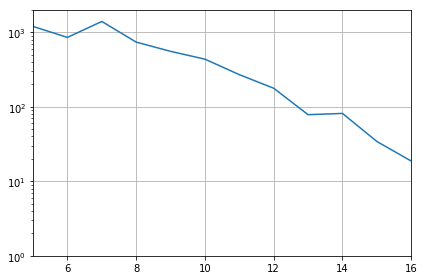

In [81]:
plt.figure()

df = pd.read_excel("Data/Branching ratios.xlsx", sheet_name="Data")
df["Var"] = df["Std"] ** 2
d = df.groupby("Total q").sum()
plt.plot(d.index + 2, d["Value"])
# plt.errorbar(df["Total q"], df["Value"])
# summed = df.groupby(["1st q", "Total q"]).sum()

# for q, d in summed.groupby("1st q"):
#     avg = np.average(d.index.get_level_values("Total q")-q, weights=d["Value"])
#     print(avg)
#     plt.errorbar(
#         d.index.get_level_values("Total q")-q,
#         d["Value"],
#         d["Var"] ** 0.5,
#     )

# df = pd.read_excel("Data/Branching ratios.xlsx", sheet_name="Alt")
# df["Var"] = df["Std"] ** 2
# summed = df.groupby(["1st q", "Total q"]).sum()
# for q, d in summed.groupby("1st q"):
#     avg = np.average(d.index.get_level_values("Total q")-q, weights=d["Value"])
#     print(avg)
#     plt.errorbar(
#         d.index.get_level_values("Total q")-q,
#         d["Value"],
#         d["Var"] ** 0.5,
#     )
    
plt.yscale("log")
plt.xlim(5, 16)
plt.ylim(1e0, 2e3)
plt.grid(True)
plt.tight_layout()
plt.show()

3.770803187245592
6.405481968935095
5.921059651131416


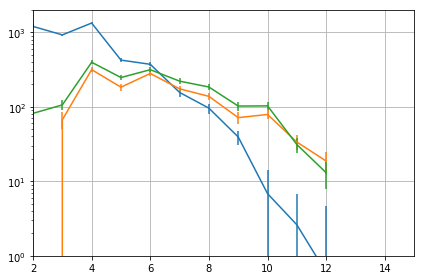

In [74]:
plt.figure()

df = pd.read_excel("Data/Branching ratios.xlsx", sheet_name="Data")
df["Var"] = df["Std"] ** 2
summed = df.groupby(["1st q", "Total q"]).sum()
for q, d in summed.groupby("1st q"):
    avg = np.average(d.index.get_level_values("Total q")-q, weights=d["Value"])
    print(avg)
    plt.errorbar(
        d.index.get_level_values("Total q")-q,
        d["Value"],
        d["Var"] ** 0.5,
    )

df = pd.read_excel("Data/Branching ratios.xlsx", sheet_name="Alt")
df["Var"] = df["Std"] ** 2
summed = df.groupby(["1st q", "Total q"]).sum()
for q, d in summed.groupby("1st q"):
    avg = np.average(d.index.get_level_values("Total q")-q, weights=d["Value"])
    print(avg)
    plt.errorbar(
        d.index.get_level_values("Total q")-q,
        d["Value"],
        d["Var"] ** 0.5,
    )
    
plt.yscale("log")
plt.xlim(2, 15)
plt.ylim(1e0, 2e3)
plt.grid(True)
plt.tight_layout()
plt.show()

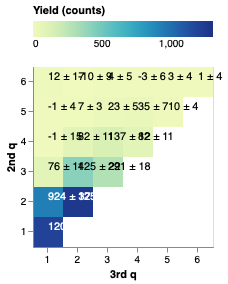

In [13]:
df = pd.read_excel("Data/Branching ratios.xlsx", sheet_name="Data")
base = alt.Chart(df, height=180, width=180).transform_filter(datum["1st q"] == 1).encode(
    alt.X('3rd q:N', axis=alt.Axis(labelAngle=0)),
    alt.Y('2nd q:N', sort="descending"),
)

base.mark_rect().encode(
    color=alt.Color(
        'Value:Q',
        scale=alt.Scale(domain=[0, 1300], nice=False),
        legend=alt.Legend(
            title="Yield (counts)",
            direction="horizontal",
            orient="top",
        ),
    )
) + base.mark_text(align="left", baseline="bottom").encode(
    text='Val and std:N',
    color=alt.condition(
        datum["Value"] < 500,
        alt.value('black'),
        alt.value('white'),
    )
)

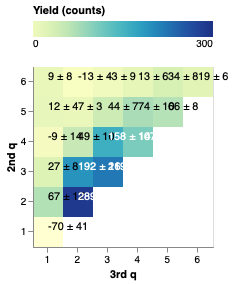

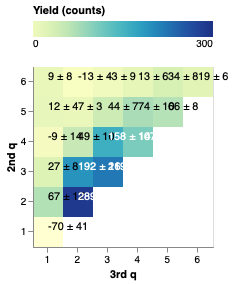

In [57]:
df = pd.read_excel("Data/Branching ratios.xlsx", sheet_name="Data")
base = alt.Chart(df, height=180, width=180).transform_filter(datum["1st q"] == 2).encode(
    alt.X('3rd q:N', axis=alt.Axis(labelAngle=0)),
    alt.Y('2nd q:N', sort="descending"),
)

base.mark_rect().encode(
    color=alt.Color(
        'Value:Q',
        scale=alt.Scale(domain=[0, 300], nice=False),
        legend=alt.Legend(
            title="Yield (counts)",
            direction="horizontal",
            orient="top",
        ),
    )
) + base.mark_text(align="left", baseline="bottom").encode(
    text='Val and std:N',
    color=alt.condition(
        datum["Value"] < 100,
        alt.value('black'),
        alt.value('white'),
    )
)

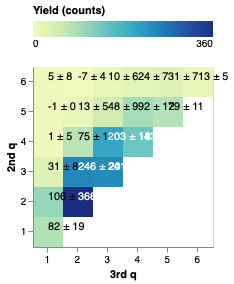

In [59]:
df = pd.read_excel("Data/Branching ratios.xlsx", sheet_name="Alt")
base = alt.Chart(df, height=180, width=180).transform_filter(datum["1st q"] == 2).encode(
    alt.X('3rd q:N', axis=alt.Axis(labelAngle=0)),
    alt.Y('2nd q:N', sort="descending"),
)

base.mark_rect().encode(
    color=alt.Color(
        'Value:Q',
        scale=alt.Scale(domain=[0, 360], nice=False),
        legend=alt.Legend(
            title="Yield (counts)",
            direction="horizontal",
            orient="top",
        ),
    )
) + base.mark_text(align="left", baseline="bottom").encode(
    text='Val and std:N',
    color=alt.condition(
        datum["Value"] < 120,
        alt.value('black'),
        alt.value('white'),
    )
)

In [51]:
def gen():
    for i0 in range(1, 2+1):
        for i1 in range(1, 6+1):
            for i2 in range(1, i1+1):
                filename = (
                    "Data/Cov ang dist and KER at the low int group; "
                    f"target=C{i0}p,I{i1}p,I{i2}p.pickle"
                )
                with open(filename, "rb") as fp:
                    d = pickle.load(fp)

                ykey = "n"
                n = d["N"]
                yield {
                    "Target": f"C{i0}p,I{i1}p,I{i2}p",
                    "Value": d["Cov[X,Y,Z]"][ykey].values * n,
                    "Std": d["Err[Cov[X,Y,Z]]"][ykey].values * n,
                }


df = pd.DataFrame(list(gen()))
df.head()

,Std,Target,Value
0,40.584569,"C2p,I1p,I1p",-69.555824
1,17.205220,"C2p,I2p,I1p",67.032816
2,22.068243,"C2p,I2p,I2p",288.873593
3,8.246536,"C2p,I3p,I1p",26.888150
4,15.811455,"C2p,I3p,I2p",192.048920


In [53]:
def gen():
    for i0 in range(2, 2+1):
        for i1 in range(1, 6+1):
            for i2 in range(1, i1+1):
                filename = (
                    "Data/Cov ang dist and KER at the low int group; "
                    f"target=C{i0}p,I{i1}p,I{i2}p & h0phi=-135--120.pickle"
                )
                with open(filename, "rb") as fp:
                    d = pickle.load(fp)

                ykey = "n"
                n = d["N"] * 360 / 225
                yield {
                    "Target": f"C{i0}p,I{i1}p,I{i2}p",
                    "Value": d["Cov[X,Y,Z]"][ykey].values * n,
                    "Std": d["Err[Cov[X,Y,Z]]"][ykey].values * n,
                }


df = pd.DataFrame(list(gen()))
df.head()

,Std,Target,Value
0,18.659406,"C2p,I1p,I1p",81.726280
1,15.512684,"C2p,I2p,I1p",106.130092
2,24.992826,"C2p,I2p,I2p",365.729482
3,7.673384,"C2p,I3p,I1p",30.617015
4,20.175245,"C2p,I3p,I2p",246.408996
